## 📝 Free/Freemium API Provider Comparison
### Provider Research Log
| Provider      | Data Completeness | Data Depth     | Data Freshness   | Rate Limits          | Python SDK                           | Documentation Quality & Community Support                               |
|:-------------:|:-----------------:|---------------:|:----------------:|:--------------------:|:------------------------------------:|:-----------------------------------------------------------------------:|
| Alpha Vantage | ☑                | 20+ years      | Up-to-date       | 25 requests/day      | Easy -- REST API, `requests`, `json` | [Comprehensive](https://www.alphavantage.co/documentation/)              |
| Tiingo | ☑ | 30+ years | Up-to-date | 50 requests/hour, 1000 requests/day; 500 symbols/month | Easy -- [Python Library/SDK](https://github.com/hydrosquall/tiingo-python?tab=readme-ov-file), REST API, `requests`, `json`| [Comprehensive](https://www.tiingo.com/documentation/general/overview)   |
| IEX Cloud/iexfinance * | N/A      | N/A           | N/A              | N/A                  | N/A                                   | N/A                                                                     |
| Twelve Data | ✔️ (Fetching adj_close requires an extra request) | 20+ years | Up-to-date | 8 requests/minute, 800 requests/day | Easy -- [Python Library/SDK](https://github.com/twelvedata/twelvedata-python), REST API, `json` | [Sufficient](https://twelvedata.com/docs#getting-started) |
| Google Finance * | N/A           | N/A            | N/A              | N/A                  | N/A                                   | N/A                                                                     |
| Polygon.io ** | ✔️ (Fetching adj_close requires an extra request) | 2 years | Delayed by 2 days | 5 requests/minute | Easy -- [Python Library/SDK](https://github.com/polygon-io/client-python), REST API, `json` | [Comprehensive](https://polygon.io/docs/rest/quickstart) |
| Alpaca ** | ✔️ (Fetching adj_close requires an extra request) | 7+ years | Up-to-date | 200 requests/minute | Easy -- [Python Library/SDK](https://github.com/alpacahq/alpaca-py), REST API, `requests`, `json` | [Sufficient](https://docs.alpaca.markets/reference/authentication-2) |

---
### Provider Pros & Cons
| Provider            |  Pros                                                                                      | Cons                                                                                       |
|:-------------------:|:------------------------------------------------------------------------------------------:|:------------------------------------------------------------------------------------------:|
| Alpha Vantage       | Awesome all-around -- Thorough Data, Great documentation, Simple Python SDK; NASDAQ licensed | Restrained service at free plan -- Low rate limits, No realtime US market data           |
| Tiingo              | Awesome all-around -- Thorough Data, Great documentation, Simple Python SDK; Cross-connected to IEX exchange | Restrained service at free plan -- Relatively low rate limits, Few screeners              |
| IEX Cloud/iexfinance * | N/A                                                                                     | N/A                                                                                        |
| Twelve Data         | Well-rounded -- Ample Data, Good documentation, Simple Python SDK, 99.95% SLA              | Restrained service at free plan -- Relatively low rate limits, No fundamental stock data; Halved request efficiency for data completeness |
| Google Finance *    | N/A                                                                                        | N/A                                                                                        |
| Polygon.io **       | Adequate -- Ample Data, Great documentation, Simple Python SDK; NASDAQ data distributor    | Restrained service at free plan -- Low rate limits, Low data depth; Latent data; Halved request efficiency for data completeness |
| Alpaca **           | Cost effective -- Ample Data, High rate limit, Good documentation, Simple Python SDK; FINRA and SEC registered | Low data depth; Halved request efficiency for data completeness        |

---
*: The API services have been retired. ([IEX Cloud/iexfinance since August 2024](https://iexcloud.org/), [Google since October 2012](https://developers.googleblog.com/en/changes-to-deprecation-policies-and-api-spring-cleaning/))\
**: Provides no free plan for business/commercial use.

## 🎖️ API Shortlist
All the API providers above could be suitable alternatives to Yahoo Finance, but the following, especially, form a shortlist:\
**Tiingo** is the best candidate for production use because
- it offers extensive historical data with decent rate limits at its free plan, and
- it is best for developing long-term quantitative strategies.

**Alpha Vantage** may serve as a secondary backup because
- it offers solid historical data depth with the most exhaustive scope of data, and
- it is best for low-volume and fundamental research.

**Alpaca** is also useful because
- it offers great rate limits for complete data, and
- it is best for enabling active trading-style and bulk ticker tracking.

## 🔍 Bonus: Intraday (1-minute) Data Exploration
All the shortlisted API providers make available 1-minute historical data for free subject to their respective rate limits same as above. At the free plan, **Alpha Vantage**'s intraday data is delayed (updated end of each trading day), and **Tiingo**'s and **Alpaca**'s are realtime but only with IEX feed.

## 📈 Visualizations

In [ ]:
# Autoreload configuration for Jupyter notebooks 
%load_ext autoreload
%autoreload 2

In [2]:
# Import and Setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from main import fetch_daily_data, fetch_intraday_data

In [22]:
# Fetching AAPL daily data from Tiingo
df_daily = fetch_daily_data("aapl", "2025-06-01", "2025-06-20", source="tiingo")
print("AAPL Daily data fetched from Tiingo:")
df_daily.head()

AAPL Daily data fetched from Tiingo:


,open,high,low,close,volume,adjClose
date,,,,,,
2025-06-20 00:00:00+00:00,198.235,201.700,196.8550,201.00,96813542,201.00
2025-06-18 00:00:00+00:00,195.940,197.570,195.0700,196.58,45394689,196.58
2025-06-17 00:00:00+00:00,197.200,198.390,195.2100,195.64,38856152,195.64
2025-06-16 00:00:00+00:00,197.300,198.685,196.5636,198.42,43020691,198.42
2025-06-13 00:00:00+00:00,199.730,200.370,195.7000,196.45,51447349,196.45


In [41]:
# Fetching AAPL intraday data from Tiingo
df_intraday = fetch_intraday_data("AAPL", "2025-06-20", None, source="tiingo")
print("AAPL Intraday data fetched from Tiingo:")
df_intraday.head()

AAPL Intraday data fetched from Tiingo:


,open,high,low,close,volume
date,,,,,
2025-06-20 19:59:00+00:00,200.975,201.040,200.700,201.020,13696.0
2025-06-20 19:58:00+00:00,200.985,201.085,200.930,200.950,15013.0
2025-06-20 19:57:00+00:00,201.115,201.170,200.855,200.985,15048.0
2025-06-20 19:56:00+00:00,201.335,201.415,201.025,201.090,35026.0
2025-06-20 19:55:00+00:00,201.355,201.695,201.240,201.335,22314.0


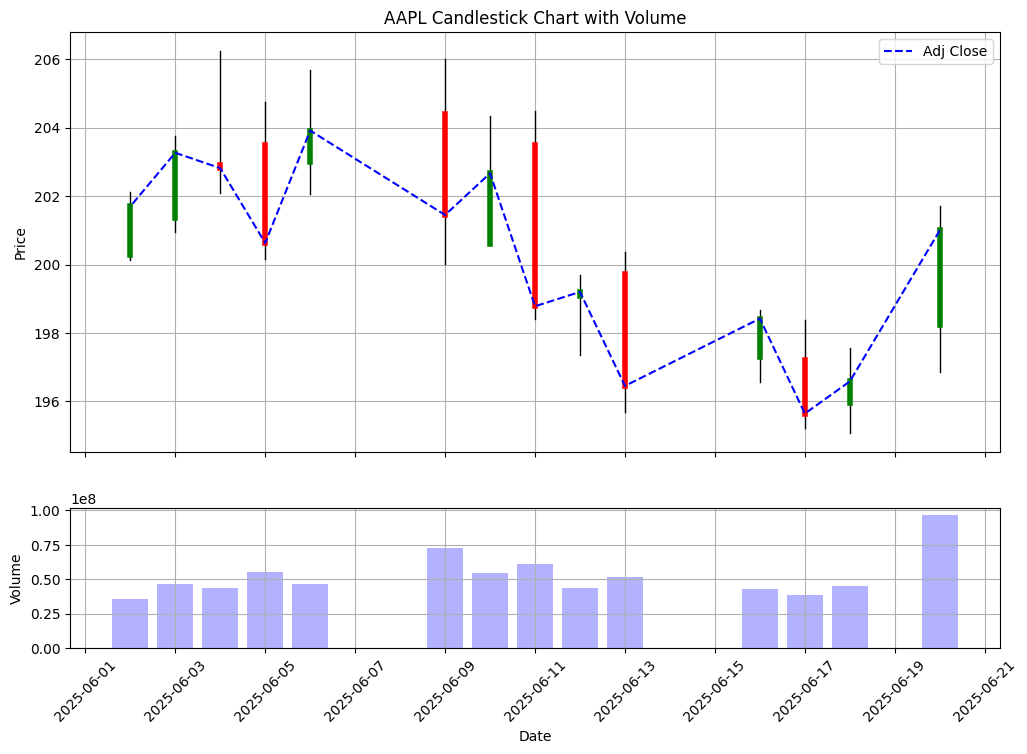

In [34]:
# Plotting AAPL Daily Data with Candlestick and Volume 
# Create a figure with 2 subplots (share the x-axis)
fig, (ax_price, ax_vol) = plt.subplots(
    2, 1, figsize=(12, 8), 
    gridspec_kw={'height_ratios': [3, 1]}, 
    sharex=True
)

# ---- Plot Candlestick ----
for date, row in df_daily.iterrows():
    o, h, l, c = row["open"], row["high"], row["low"], row["close"]

    color = "green" if c >= o else "red"

    # Wick
    ax_price.plot([date, date], [l, h], color="black", linewidth=1)
    # Body
    ax_price.plot([date, date], [o, c], color=color, linewidth=4)

# ---- Plot Adjusted Close ----
ax_price.plot(df_daily.index, df_daily['adjClose'], color='blue', label='Adj Close', linestyle='--')

# ---- Plot Volume ----
ax_vol.bar(df_daily.index, df_daily["volume"], color="blue", alpha=0.3)

# ---- Format X-axis ----
ax_vol.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax_vol.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

# Labels and Grid
ax_price.set(title="AAPL Candlestick Chart with Volume", ylabel="Price")
ax_price.legend()
ax_vol.set(xlabel="Date", ylabel="Volume")
ax_price.grid(True)
ax_vol.grid(True)

plt.show()

/tmp/ipykernel_264054/1564721948.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_price.legend()


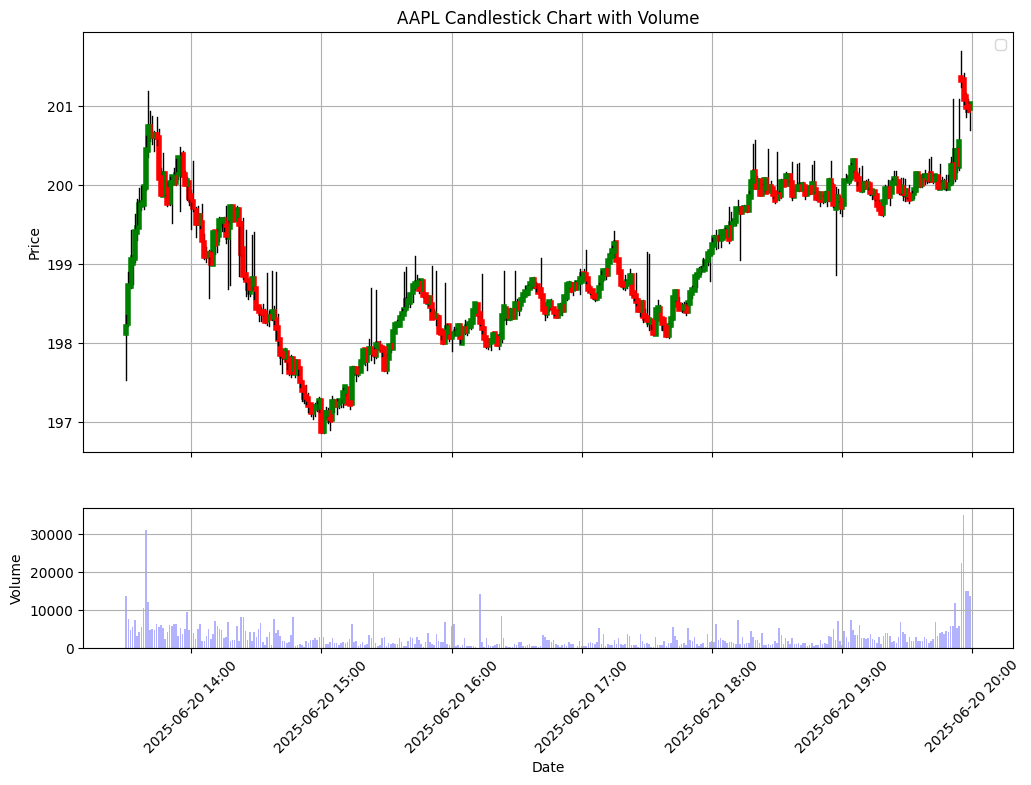

In [43]:
# Plotting AAPL Intraday Data with Line Chart
# Create a figure with 2 subplots (share the x-axis)
fig, (ax_price, ax_vol) = plt.subplots(
    2, 1, figsize=(12, 8), 
    gridspec_kw={'height_ratios': [3, 1]}, 
    sharex=True
)

# ---- Plot Candlestick ----
for date, row in df_intraday.iterrows():
    o, h, l, c = row["open"], row["high"], row["low"], row["close"]

    color = "green" if c >= o else "red"

    # Wick
    ax_price.plot([date, date], [l, h], color="black", linewidth=1)
    # Body
    ax_price.plot([date, date], [o, c], color=color, linewidth=4)

# ---- Plot Volume ----
ax_vol.bar(df_intraday.index, df_intraday["volume"], color="blue", alpha=0.3, width = 0.0005)

# ---- Format X-axis ----
ax_vol.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
ax_vol.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

# Labels and Grid
ax_price.set(title="AAPL Candlestick Chart with Volume", ylabel="Price")
ax_price.legend()
ax_vol.set(xlabel="Date", ylabel="Volume")
ax_price.grid(True)
ax_vol.grid(True)

plt.show()